In [ ]:
import pandas as pd # Pengolahan data tabel seperti select field
import numpy as np # Pengolahan angka,matriks,vektor
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/DataSource/Sample - Superstore.xlsx'

data = pd.read_excel(path)
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2020-138688,2020-06-12,2020-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2018-110422,2018-01-21,2018-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2021-121258,2021-02-26,2021-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2021-121258,2021-02-26,2021-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2021-121258,2021-02-26,2021-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


## Business Undesrtanding
Superstore adalah perusahaan ber skala nasional di US, Segmentasi penjualan pada korporasi, consumer dan home office. Superstore juga sebagai supplier untuk barang-barang kebutuhan kantor seperti binders, mesin copier, dan lain sebagainya.

Sebagai suplier dan sekaligus pengecer di level consumer, Superstore memiliki kebutuhan stok level yang aman untuk 2 tahun kedepan, mengingat produk- produk tersebut selalu terjual setiap harinya di berbagai cabang super store.

goal: predictive stock level product category 2 tahun kedepan

problem: prediksi timeseries - supervised learning

## Data Understanding

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

In [ ]:
data.isnull().sum()

Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Country/Region     0
City               0
State              0
Postal Code       11
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64

In [ ]:
# Cek Berapa Jumlah Transaksi Berdasarkan Product Name

data['Product Name'].value_counts()

Staple envelope                                                                        48
Easy-staple paper                                                                      46
Staples                                                                                46
Avery Non-Stick Binders                                                                20
Staples in misc. colors                                                                19
                                                                                       ..
Boston 1900 Electric Pencil Sharpener                                                   1
RCA ViSYS 25423RE1 Corded phone                                                         1
Canon Color ImageCLASS MF8580Cdw Wireless Laser All-In-One Printer, Copier, Scanner     1
Newell 342                                                                              1
Eldon Jumbo ProFile Portable File Boxes Graphite/Black                                  1
Name: Prod

In [ ]:
# Cek Berapa Jumlah Transaksi Berdasarkan Sub-Category

data['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [ ]:
# Cek Berapa Jumlah Transaksi Berdasarkan Category

data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

## Data Preparation

In [ ]:
# Menghitung tanggal kapan terakhir transaksi
data['latest_date_transaction'] = data.groupby('Customer Name')['Order Date'].transform('max')
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,latest_date_transaction
0,1,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2021-01-26
1,2,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2021-01-26
2,3,CA-2020-138688,2020-06-12,2020-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2021-12-11
3,4,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2021-12-01
4,5,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2021-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2018-110422,2018-01-21,2018-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,2021-06-11
9990,9991,CA-2021-121258,2021-02-26,2021-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,2021-12-14
9991,9992,CA-2021-121258,2021-02-26,2021-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,2021-12-14
9992,9993,CA-2021-121258,2021-02-26,2021-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,2021-12-14


In [ ]:
## melihat pola daata series binders

data_binders = data[data['Sub-Category']=='Binders']

#Mengurutkan Orderdate
data_binders['Order Date'].min(), data_binders['Order Date'].max()

(Timestamp('2018-01-04 00:00:00'), Timestamp('2021-12-30 00:00:00'))

In [ ]:
# Memilih DataFrame Order Date dan Binder

data_binders = data_binders.groupby('Order Date')['Quantity'].sum().reset_index()
data_binders

,Order Date,Quantity
0,2018-01-04,2
1,2018-01-06,2
2,2018-01-07,7
3,2018-01-13,5
4,2018-01-16,2
...,...,...
771,2021-12-25,22
772,2021-12-26,2
773,2021-12-28,19
774,2021-12-29,1


In [ ]:
data_binders = data_binders.set_index('Order Date')
data_binders.index

DatetimeIndex(['2018-01-04', '2018-01-06', '2018-01-07', '2018-01-13',
               '2018-01-16', '2018-01-19', '2018-01-20', '2018-01-26',
               '2018-01-28', '2018-02-02',
               ...
               '2021-12-20', '2021-12-21', '2021-12-22', '2021-12-23',
               '2021-12-24', '2021-12-25', '2021-12-26', '2021-12-28',
               '2021-12-29', '2021-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=776, freq=None)

# Melakukan Decomposite

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
data_binders.head()

,Quantity
Order Date,
2018-01-04,2
2018-01-06,2
2018-01-07,7
2018-01-13,5
2018-01-16,2


In [ ]:
# Proses melengkapi data yang terlompat orderdatenya
data_binders = data_binders['Quantity'].resample('MS').mean()
data_binders

Order Date
2018-01-01     4.666667
2018-02-01     4.111111
2018-03-01     7.909091
2018-04-01     5.642857
2018-05-01     6.571429
2018-06-01     5.000000
2018-07-01     7.428571
2018-08-01     6.733333
2018-09-01     6.473684
2018-10-01     4.250000
2018-11-01     8.263158
2018-12-01     6.888889
2019-01-01     3.600000
2019-02-01     5.142857
2019-03-01     4.818182
2019-04-01     5.642857
2019-05-01     4.066667
2019-06-01     7.357143
2019-07-01     6.812500
2019-08-01     4.705882
2019-09-01    10.150000
2019-10-01     7.333333
2019-11-01    10.952381
2019-12-01     9.687500
2020-01-01     4.800000
2020-02-01     5.833333
2020-03-01     6.000000
2020-04-01     6.294118
2020-05-01     6.421053
2020-06-01     7.066667
2020-07-01     6.312500
2020-08-01     8.235294
2020-09-01     9.040000
2020-10-01     8.333333
2020-11-01    11.904762
2020-12-01     9.148148
2021-01-01     8.500000
2021-02-01     4.000000
2021-03-01     8.095238
2021-04-01     7.736842
2021-05-01     6.900000
2021-

In [ ]:
data_binders = data_binders.to_frame().reset_index()
data_binders = data_binders.rename(columns={0:'Quantity'})
data_binders.index.name = 'Order Date'
data_binders.set_index('Order Date', inplace = True)

In [ ]:
data_binders

,Quantity
Order Date,
2018-01-01,4.666667
2018-02-01,4.111111
2018-03-01,7.909091
2018-04-01,5.642857
2018-05-01,6.571429
2018-06-01,5.000000
2018-07-01,7.428571
2018-08-01,6.733333
2018-09-01,6.473684


In [ ]:
data_binders.sort_index(inplace = True)
data_binders.index

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01'],
              dtype='datetime64[ns]', name='Order Date', freq=None)

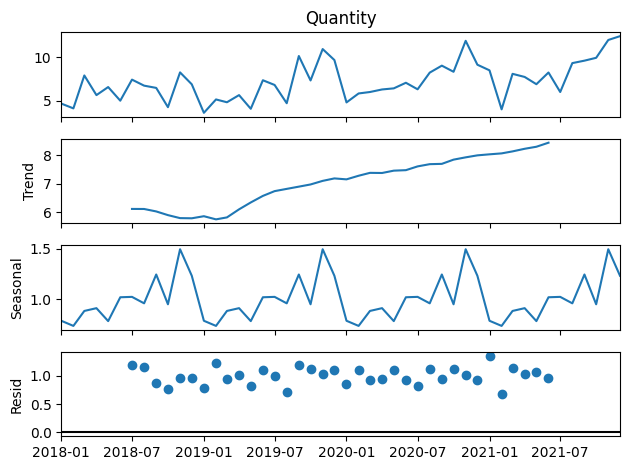

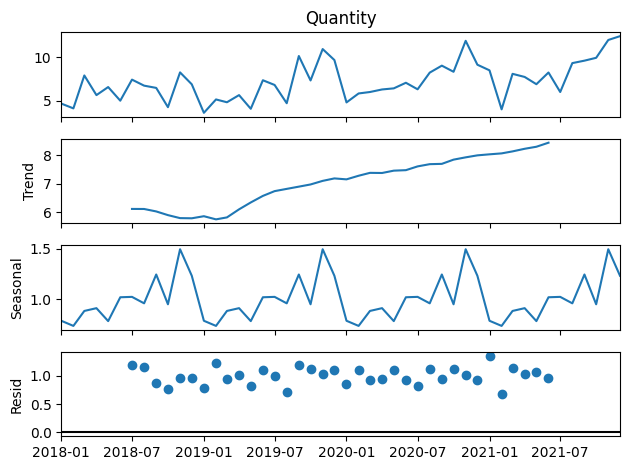

In [ ]:
dec_data_binders = seasonal_decompose(data_binders['Quantity'], model = 'multoplicative')
dec_data_binders.plot()

In [ ]:
!pip3 install statsmodels

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
# SPLIT data training dan testing

train=data_binders.iloc[:len(data_binders)-12]
test=data_binders.iloc[len(data_binders)-24:]

In [ ]:
# Membuat model SARIMAX

# Dalam kasus ini, model SARIMAX menggunakan orde autoregressive (p),
# orde differencing (d), dan orde moving average (q) masing-masing adalah 1, 0, dan 0.

#seasonal_order =(2, 1, 0, 12): Ini adalah parameter seasonal order yang mengacu pada orde komponen ARIMA musiman.
# Dalam kasus ini, model SARIMA menggunakan orde autoregressive musiman (P), orde differencing musiman (D),
# orde moving average musiman (Q), dan panjang musiman (S) masing-masing adalah 2, 1, 0, dan 12.

model_sarimax = SARIMAX(data_binders['Quantity'],
                        order=(1, 0, 0),
                        seasonal_order=(2, 1, 0, 12))

# Melatih model SARIMAX
result_sarimax = model_sarimax.fit()

# Membuat prediksi dengan model
forecast_steps = 12 # Jumlah langkah ke depan yang ingin diprediksi

# Melakukan prediksi
prediction = result_sarimax.get_forecast(steps=forecast_steps)

# Mendapatkan nilai prediksi
forecast_values = prediction.predicted_mean
confidence_intervals = prediction.conf_int()

# Menampilkan hasil prediksi
print(forecast_values)
print(confidence_intervals)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2022-01-01     8.230106
2022-02-01     4.275623
2022-03-01     7.838414
2022-04-01     7.555985
2022-05-01     6.885773
2022-06-01     8.083940
2022-07-01     6.031493
2022-08-01     9.260666
2022-09-01     9.513876
2022-10-01     9.748263
2022-11-01    12.007549
2022-12-01    11.983806
Freq: MS, Name: predicted_mean, dtype: float64
            lower Quantity  upper Quantity
2022-01-01        4.508608       11.951604
2022-02-01        0.546362        8.004883
2022-03-01        4.109121       11.567708
2022-04-01        3.826692       11.285279
2022-05-01        3.156480       10.615067
2022-06-01        4.354647       11.813234
2022-07-01        2.302200        9.760787
2022-08-01        5.531373       12.989960
2022-09-01        5.784583       13.243169
2022-10-01        6.018969       13.477556
2022-11-01        8.278255       15.736842
2022-12-01        8.254512       15.713099


In [ ]:
result_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           Quantity   No. Observations:                   48
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood                 -74.288
Date:                            Tue, 31 Oct 2023   AIC                            156.576
Time:                                    18:49:47   BIC                            162.910
Sample:                                01-01-2018   HQIC                           158.787
                                     - 12-01-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0646      0.178      0.364      0.716      -0.283       0.413
ar.S.L12      -0.1351      0.297     -0.455      0.649      -0.717       0.447
ar.S.L24       0.0214      0.295      0.073      0.942      -0.557       0.600
sigma2         3.6053      1.075      3.355      0.001       1.499       5.712
===================================================================================
Ljung-Box (L1) (Q):                   2.32   Jarque-Bera (JB):                 0.71
Prob(Q):                              0.13   Prob(JB):                         0.70
Heteroskedasticity (H):               0.69   Skew:                            -0.26
Prob(H) (two-sided):                  0.54   Kurtosis:                         2.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['type']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Order Date'>

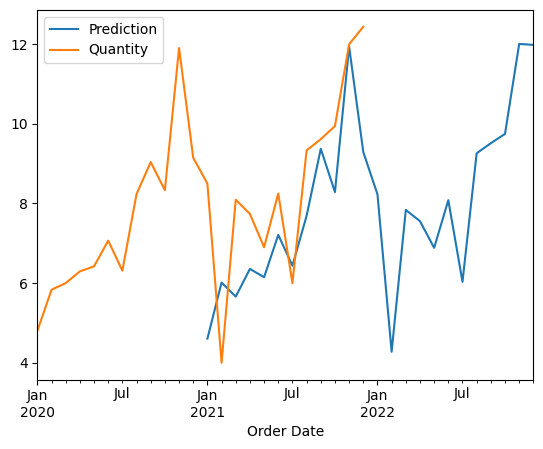

In [ ]:
# Menghitung panjang data latih (train) dan data uji (test)
x=len(train)
y=len(train) + len(test) - 1

# Prediksi untuk 1 tahun
predic = result_sarimax.predict(x,y, type='level').rename('Prediction')

# Plot prediksi VS Actual
predic.plot(legend=True)
test['Quantity'].plot(legend=True)

# Evaluasi Model

In [ ]:
# Load tools evaluasi
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tools.eval_measures import rmse

In [ ]:
mean_absolute_percentage_error(test['Quantity'],predic)

0.025274364771117358